In [1]:
import torchvision
from transformers import GPT2LMHeadModel

2025-02-08 16:38:21.042060: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-08 16:38:21.415932: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-08 16:38:21.416010: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-08 16:38:21.417879: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-08 16:38:21.591894: I tensorflow/core/platform/cpu_feature_g

In [5]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")  
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [6]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

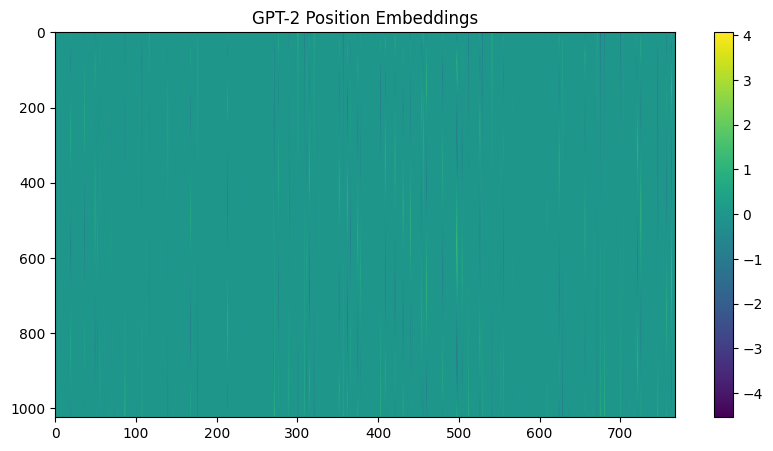

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Extract the position embedding weights
wpe_weights = sd_hf["transformer.wpe.weight"].detach().cpu().numpy()

# Plot the embeddings
plt.figure(figsize=(10, 5))  # Set figure size
plt.imshow(wpe_weights, aspect="auto")  # Correct function
plt.colorbar()  # Add color bar
plt.title("GPT-2 Position Embeddings")
plt.show()

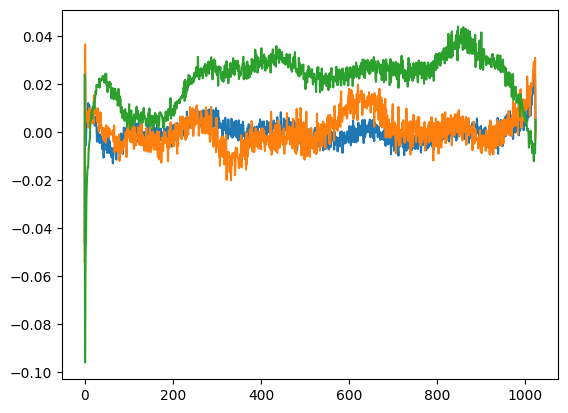

In [12]:
plt.plot(sd_hf["transformer.wpe.weight"][:,150])
plt.plot(sd_hf["transformer.wpe.weight"][:,200])
plt.plot(sd_hf["transformer.wpe.weight"][:,250])

In [16]:
print(sd_hf["transformer.h.1.attn.c_attn.bias"].shape)

torch.Size([2304])


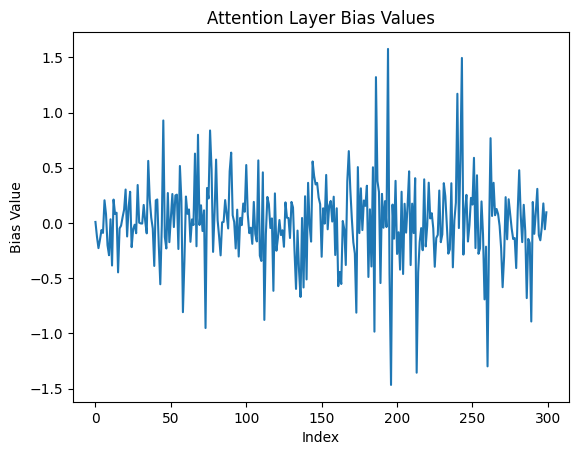

In [19]:
bias_values = sd_hf["transformer.h.1.attn.c_attn.bias"].cpu().numpy()
plt.plot(bias_values[:300])  # Take the first 300 values
plt.title("Attention Layer Bias Values")
plt.xlabel("Index")
plt.ylabel("Bias Value")
plt.show()

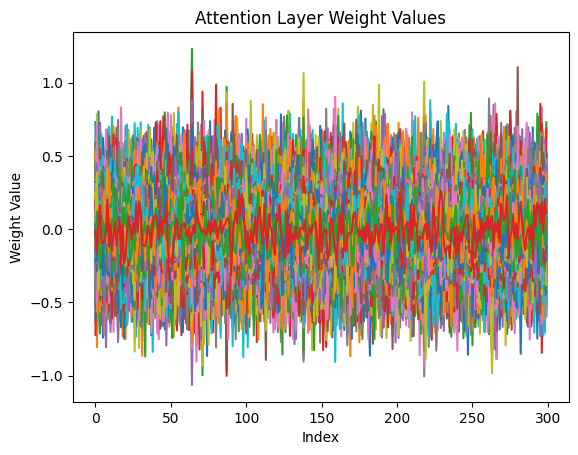

In [20]:
bias_values = sd_hf["transformer.h.1.attn.c_attn.weight"].cpu().numpy()
plt.plot(bias_values[:300]) 
plt.title("Attention Layer Weight Values")
plt.xlabel("Index")
plt.ylabel("Weight Value")
plt.show()

In [22]:
from transformers import pipeline, set_seed
generator = pipeline("text-generation", model='gpt2')
set_seed(42)
generator("Hello I am coding gpt, ", max_length = 50, num_return_sequences=5)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello I am coding gpt, ive no idea what this is doing except it seems to help me build the GUI itself (probably by setting it up)\n\nI was wondering if maybe you could get something working at the same time as it'},
 {'generated_text': 'Hello I am coding gpt, \xa0which means.NET, Visual Basic 2.6, a few things are changing a bit. \xa0The default configuration is to run gpt from a command prompt, but with all of my changes in'},
 {'generated_text': "Hello I am coding gpt, ive put this here to explain my current situation. All I have to do is change my language, and a few bits of code I've been working on will show you my error messages. I dont know if"},
 {'generated_text': 'Hello I am coding gpt, ive not done much, but i am trying to work in the evenings and i did it about 7 minutes ago and everything took a long time so i have to start some code. Thanks for asking: ) ('},
 {'generated_text': 'Hello I am coding gpt, ive made some gpts for a long-standing project. I